In [0]:
import numpy as np
from scipy import special
from scipy import stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

1.Toma de datos: escoja una calle donde la afluencia de objetos (dígase carros o personas) no sea muy alta, en particular, algún sitio donde no haya semáforos cerca. Realice un conteo de objetos en intervalos de un minuto. Realice el conteo durante una hora. Los datos tomados fueron con los vídeos llamados: "paso vehiculos.mp4", los cuales podras ver en los archivos de classroom.
 \

información extra: en el vídeo aparece que se demora 7.30 minutos, para eso hacemos una regla de tres en donde cual sería el minuto equivalente de nuestro 7.30...el resultado es de 7 segundos, entonces contamos los carros que pasan cada 7 segundos en ese vídeo en particular


In [0]:
#Objetos = np.array([7,5,9,12,12,13,10,12,12,16,11,17,12,12,9,7,13,9,9,8,15,13,11,6,6,16,1,11,13,20,11,8,22,7,9,22,14,4])
Objetos = np.array([3,5,1,11,1,8,6,10,10,7,7,3,9,3,11,5,12,2,15,4,12,4,14,5,8,3,3,8,5,8,1,8,2,6,4,13,4,13,3,8,3,2,12,8,0,1,1,13,11,4,13,8,6,8,3,12,8,5,11,5])
la = np.mean(Objetos)

2. A partir del conjunto de datos obtenga el número medio de resultados.

In [30]:
print("Número medio de los resultados:",la)

Número medio de los resultados: 6.65


3.Con el valor del número medio de resultados, cree un conjunto de datos simulados que sigan una distribución de Poisson (ayuda: se recomienda usar scipy.stats.poisson).

In [31]:
histp = stats.poisson.rvs(la,size=60) # Datos aleatorios de Poisson

print("Conjunto de datos simulados:",histp)

Conjunto de datos simulados: [ 5  1  7  4  6  5 10  7  4 10  7 10  7  8 11  8  3 10  4  7  9 13 11 10
  5  4  8 11  2  4  6  8  4  4  7  7  5  9 14  5  5  6  3  3  8  3 12  8
  5  5  9  8  6  6  3  5  8  4 13  7]


4.Grafique los datos reales y los datos simulados conjuntamente. ¿Qué diferencias o similitudes encuentra entre los datos experimentales y simulados?

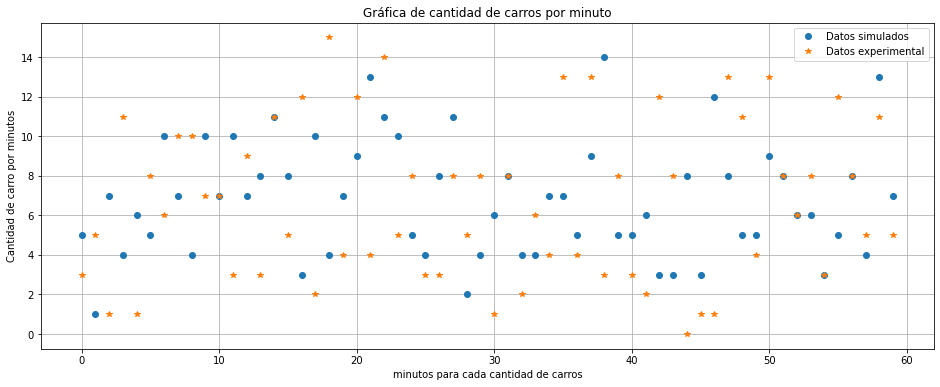

In [32]:
fig3 = plt.figure(figsize=(16,6))
x = np.arange(0,60)
plt.title("Gráfica de cantidad de carros por minuto")
plt.plot(x,histp, "o", label="Datos simulados")
plt.plot(x, Objetos, "*", label="Datos experimental")
plt.legend()
plt.xlabel("minutos para cada cantidad de carros")
plt.ylabel("Cantidad de carro por minutos")
plt.grid()

Vemos que los datos simulados y experimentales son diferentes (obviamente), pero observemos con más detenidamente esa gráfica. Es notable que los datos simulados tiende a parecerse un poco a los datos experimentales.

5. Realice un gráfico de los residuos de ambos conjuntos de datos y grafique conjuntamente, ¿puede decir que los datos están distribuidos aleatoriamente?.

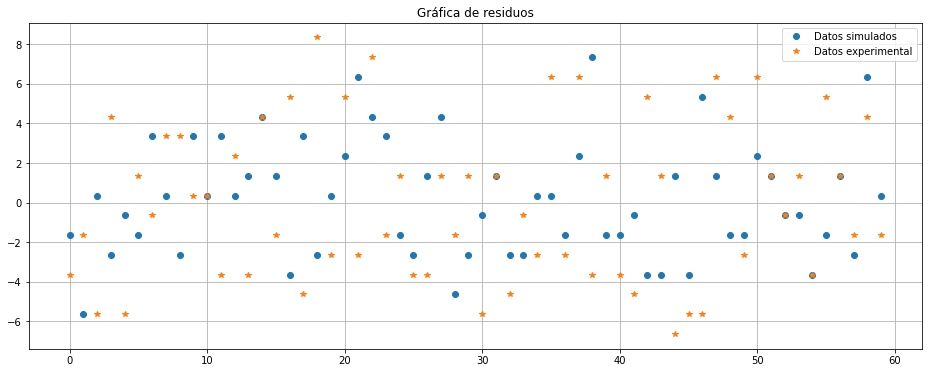

In [33]:
nuevo1 = Objetos - la
nuevo2 = histp - la

fig3 = plt.figure(figsize=(16,6))
plt.title("Gráfica de residuos")
plt.plot(x,nuevo2, "o", label="Datos simulados")
plt.plot(x,nuevo1, "*", label="Datos experimental")
plt.legend()
plt.grid()

Los datos como podemos apreciar en la gráfica anterior, podemos asegurar que los datos están distribuidos aleatoriamente. 

6. Graficar los histogramas de cada conjunto de datos y superponga la distribución teórica. Analizar y concluir sobre los resultados obtenidos.

In [34]:
#distribucion de objetos Experimentales
unique, counts = np.unique(Objetos, return_counts=True)
dict(zip(unique, counts))

{0: 1,
 1: 5,
 2: 3,
 3: 8,
 4: 5,
 5: 6,
 6: 3,
 7: 2,
 8: 10,
 9: 1,
 10: 2,
 11: 4,
 12: 4,
 13: 4,
 14: 1,
 15: 1}

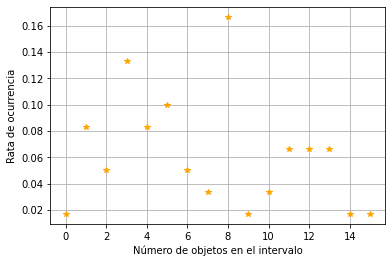

In [35]:
distobj = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[1,5,3,8,5,6,3,2,10,1,2,4,4,4,1,1]])

plt.plot(distobj[0,:],distobj[1,:]/60,'*',color='orange')
plt.xlabel('Número de objetos en el intervalo')
plt.ylabel('Rata de ocurrencia')
plt.grid()

In [38]:
#distribucion de objetos Simulados
unique, counts = np.unique(histp, return_counts=True)
dict(zip(unique, counts))

{1: 1,
 2: 1,
 3: 5,
 4: 8,
 5: 9,
 6: 5,
 7: 8,
 8: 8,
 9: 3,
 10: 5,
 11: 3,
 12: 1,
 13: 2,
 14: 1}

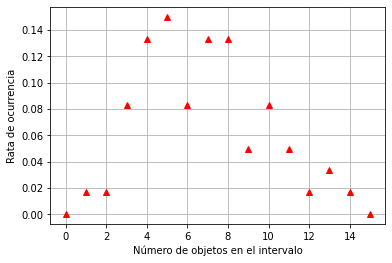

In [43]:
disthis = np.array([[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],[0,1,1,5,8,9,5,8,8,3,5,3,1,2,1,0]])

plt.plot(disthis[0,:],disthis[1,:]/60,'^',color='red')
plt.xlabel('Número de objetos en el intervalo')
plt.ylabel('Rata de ocurrencia')
plt.grid()

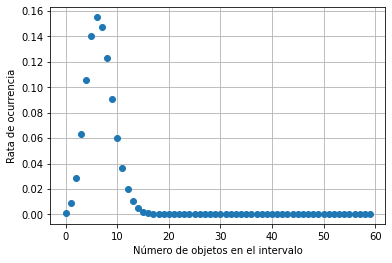

In [41]:
#Distribucion teorica (Dis. Poisson)
x = np.arange(0,60)
HISTp = stats.poisson.pmf(x,la) # función probabilidad de Poisson

plt.plot(x,HISTp,'o')
plt.xlabel('Número de objetos en el intervalo')
plt.ylabel('Rata de ocurrencia')
plt.grid()

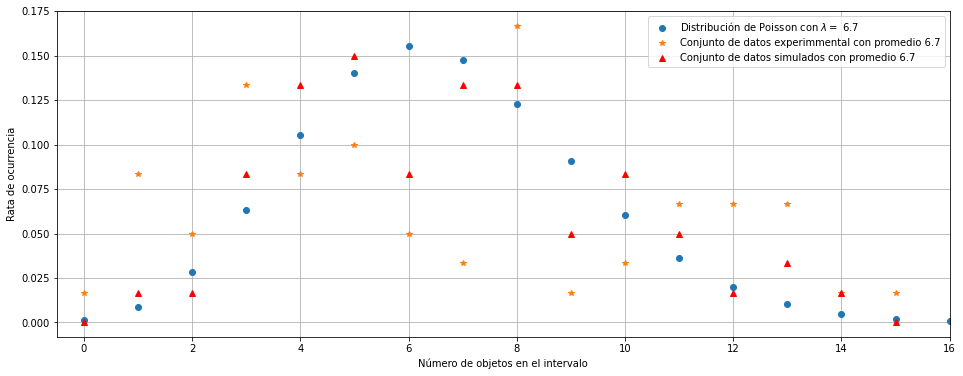

In [44]:
fig3 = plt.figure(figsize=(16,6))
plt.plot(x,HISTp,'o', label='Distribución de Poisson con $\lambda=$ %.1f' % la)
plt.plot(distobj[0,:],distobj[1,:]/Objetos.size,'*',label='Conjunto de datos experimmental con promedio %.1f' % la)
plt.plot(disthis[0,:],disthis[1,:]/60,'^',color='red',label='Conjunto de datos simulados con promedio %.1f' % la)
plt.xlabel('Número de objetos en el intervalo')
plt.ylabel('Rata de ocurrencia')
plt.xlim(-0.5,16)
plt.legend()
plt.grid()

Podemos obvervar como nuestra distribucion de Poisson tiende a estar dentro de un rango apreciable y logico de nuestros conjuntos

7. Calcule la probabilidad para los datos experimentales y simulados de que pasen entre 2 y 5 de los objetos por la calle que escogió en el intervalo de un minuto. ¿Cuántos esperaría ver pasar en 10 minutos?


In [45]:
#probabilidad para que pasen 2 objetos
num1 = 2
prob1 = (la**num1*np.exp(-la)/math.factorial(num1))*100

print("la probabilidad de ver 2 objetos en el intervalo de 1 minuto es: %.1f%%" % prob1)

la probabilidad de ver 2 objetos en el intervalo de 1 minuto es: 2.9%


In [46]:
#probabilidad para que pasen 5 objetos
num2 = 5
prob2 = (la**num2*np.exp(-la)/math.factorial(num2))*100

print("la probabilidad de ver 5 objetos en el intervalo de 1 minuto es: %.1f%%" % prob2)

la probabilidad de ver 5 objetos en el intervalo de 1 minuto es: 14.0%


In [47]:
print("la probabilidad de ver entre 2 y 5 objetos en el intervalo de 1 minuto es: %.1f%%" % (prob1+prob2))

la probabilidad de ver entre 2 y 5 objetos en el intervalo de 1 minuto es: 16.9%


En un minuto según nuestras gráficas y la estadistica obtenemos que pasan 6.7 objetos....ahora en 10 minutos ¿cuantos carros van a pasar? simplemente multiplicamos el 6.7 por los 10 minutos. \
Luego en 10 minutos uno esperaría ver 67 objetos.